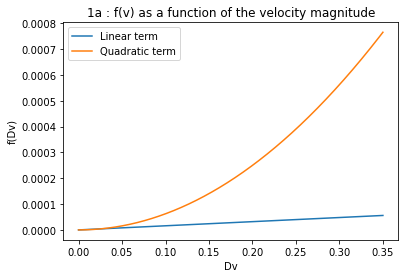

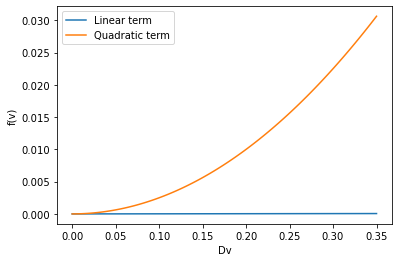

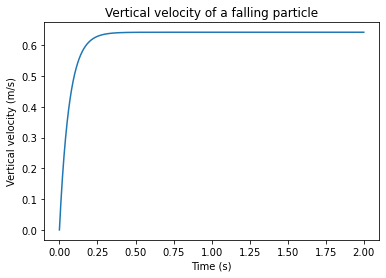

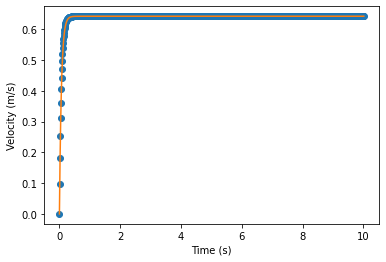

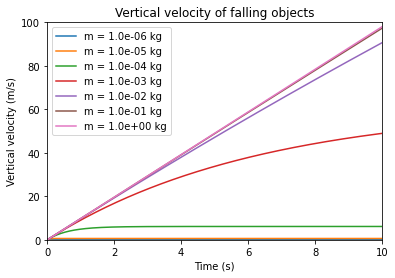

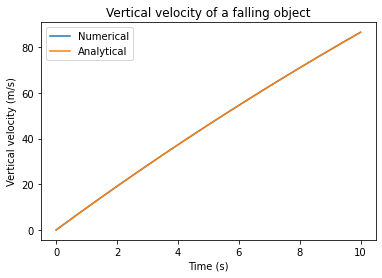

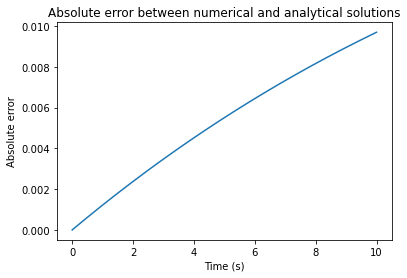

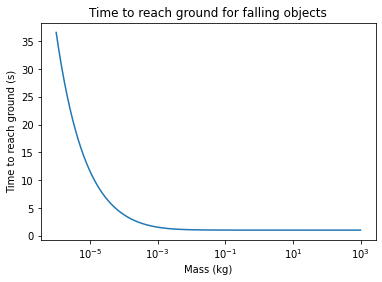

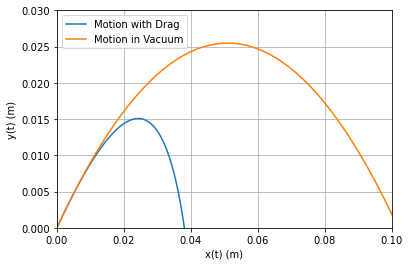

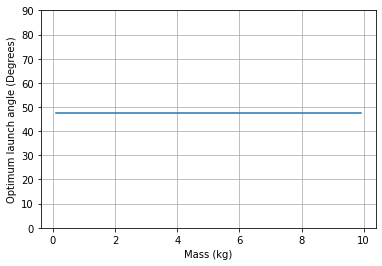

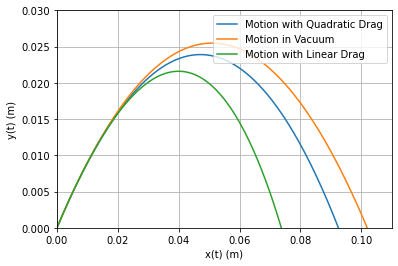

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

#1a
def Section_1a ():
    import numpy as np
    import matplotlib.pyplot as plt

    D = 0.1 # diameter of the spherical object (in meters)
    B = 1.6e-4 # coefficient for the linear term
    C = 0.25 # coefficient for the quadratic term
    
    # Functions representing the linear and quadratic terms
    def f_linear(x):
        return B*x

    def f_quadratic(x):
        return 0.25/4*D*x**2

    x = np.linspace(0, 0.35, 1000) # range of values for Dv
    f_l = f_linear(x)
    f_q = f_quadratic(x)
    
    # Plot the results
    plt.plot(x, f_l, label='Linear term')
    plt.plot(x, f_q, label='Quadratic term')
    plt.xlabel('Dv')
    plt.ylabel('f(Dv)')
    plt.title('1a : f(v) as a function of the velocity magnitude')
    plt.legend()
    plt.show()

#1b
def Section_1b ():
    # Parameters for the spherical object
    # Diameter values tested (m):
    # Baseball:
    D = 0.07
    # Oildrop:
    # D = 1.5e-6
    # Raindrop:
    # D = 0.001
    B = 1.6e-4  # Coefficient for linear term
    C = 0.25  # Coefficient for quadratic term

    # Range of velocities
    # Velocity values tested (m/s):
    # Baseball:
    v = np.linspace(0, 5, 100)
    # Oildrop:
    # v = np.linspace(0, 5e-5, 100)
    # Raindrop:
    # v = np.linspace(0, 1, 100)

    # Compute the linear and quadratic terms
    bv = B * D * v
    cv2 = C * D ** 2 * v ** 2

    # Plot the results
    plt.plot(D * v, bv, label='Linear term')
    plt.plot(D * v, cv2, label='Quadratic term')
    plt.xlabel('Dv')
    plt.ylabel('f(v)')
    plt.legend()
    plt.show()

#2a
def Section_2a():
    # Parameters for the particle
    D = 1e-4  # Diameter in meters
    rho = 2e3  # Mass density in kg/m^3
    m = (4 / 3) * np.pi * (D / 2) ** 3 * rho  # Mass in kg
    B = 1.6e-4  # Coefficient for linear term
    b = B * D  # Coefficient for linear term
    g = 9.81  # Acceleration due to gravity in m/s^2

    # Time array
    t = np.linspace(0, 2, 1000)

    # Velocity array
    vy = np.zeros_like(t)

    # Initial conditions
    vy[0] = 0  # Starting from rest

    # Numerical integration
    for i in range(1, len(t)):
        vy[i] = vy[i - 1] + (g - b / m * vy[i - 1]) * (t[i] - t[i - 1])

    # Plot the results
    plt.plot(t, vy)
    plt.xlabel('Time (s)')
    plt.ylabel('Vertical velocity (m/s)')
    plt.title('Vertical velocity of a falling particle')
    plt.show()

#2b
def Section_2b():
    # setting parameters
    g = 9.81
    D = 1.e-4
    volume = (4.0 / 3.0) * math.pi * (D / 2.0) ** 3
    rho = 2000  # given in the exercise
    m = rho * volume
    B = 1.6e-4
    b = B * D
    dt = 0.01
    tmax = 10  # seconds

    # initial conditions
    t = 0
    vy = 0

    # t=0
    time = [t]
    velocity = [vy]

    velocity_analytical = [vy]

    # This condition is ok as long as we are not monitoring position of the object
    # DEFINE THE GROUND
    while (t < tmax):
        dvy = g * dt - (b / m) * vy * dt
        vy = vy + dvy

        t = t + dt
        time.append(t)
        velocity.append(vy)

        # analytical solution
        formula = (m * g / b) * (1.0 - math.exp(-b * t / m))
        velocity_analytical.append(formula)

    plt.figure()
    plt.plot(time, velocity, 'o')
    plt.plot(time, velocity_analytical)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.show()

#2c
def Section_2c():
    # Parameters for the object
    D = 1  # Diameter in meters
    rho = 1.2  # Mass density in kg/m^3
    B = 1.6e-4  # Coefficient for linear term
    g = 9.81  # Acceleration due to gravity in m/s^2

    # Time parameters
    tmax = 10  # Maximum time in seconds
    dt = 0.01  # Time step in seconds

    # Mass range to loop over
    m_range = np.logspace(-6, 0, num=7)  # From 1 microgram to 1 kilogram

    # Loop over masses
    for m in m_range:
        # Calculate coefficients for linear air resistance term
        b = B * D

        # Initialize time and velocity variables
        t = 0
        vy = 0

        # Lists to store results
        t_list = []
        vy_list = []

        # Loop over time steps
        while t <= tmax:
            dvy = g * dt - (b / m) * vy * dt  # Change in velocity
            vy += dvy  # Update velocity
            t += dt  # Update time
            t_list.append(t)  # Store time value
            vy_list.append(vy)  # Store velocity value

        # Plot the results
        plt.plot(t_list, vy_list, label=f'm = {m:.1e} kg')

    # Add axis labels and legend
    plt.xlabel('Time (s)')
    plt.ylabel('Vertical velocity (m/s)')
    plt.title('Vertical velocity of falling objects')
    plt.ylim(0, 100)
    plt.xlim(0, 10)
    plt.legend()
    plt.show()

#2d
def Section_2d():
    # Parameters for the object
    D = 0.1  # Diameter in meters
    rho = 1.2  # Mass density in kg/m^3
    m = (4 / 3) * np.pi * (D / 2) ** 3 * rho  # Mass in kg
    B = 1.6e-4  # Coefficient for linear term
    b = B * D  # Coefficient for linear term
    g = 9.81  # Acceleration due to gravity in m/s^2

    # Time array
    t = np.linspace(0, 10, 1000)

    # Velocity arrays
    vy_num = np.zeros_like(t)  # Numerical solution
    vy_an = np.zeros_like(t)  # Analytical solution

    # Initial conditions
    vy_num[0] = 0  # Starting from rest
    vy_an[0] = 0  # Starting from rest

    # Numerical integration
    for i in range(1, len(t)):
        dt = t[i] - t[i - 1]
        dvy = g * dt - (b / m) * vy_num[i - 1] * dt
        vy_num[i] = vy_num[i - 1] + dvy
        vy_an[i] = m * g / b * (1 - np.exp(-b * t[i] / m))

    # Plot the results
    plt.plot(t, vy_num, label='Numerical')
    plt.plot(t, vy_an, label='Analytical')
    plt.xlabel('Time (s)')
    plt.ylabel('Vertical velocity (m/s)')
    plt.title('Vertical velocity of a falling object')
    plt.legend()
    plt.show()

    # Plot the error
    error = np.abs(vy_num - vy_an)
    plt.plot(t, error)
    plt.xlabel('Time (s)')
    plt.ylabel('Absolute error')
    plt.title('Absolute error between numerical and analytical solutions')
    plt.show()

#2e
def Section_2e():
    # Parameters for the object
    D = 0.1  # Diameter in meters
    rho = 1.2  # Mass density in kg/m^3
    B = 1.6e-4  # Coefficient for linear term
    b = B * D  # Coefficient for linear term
    g = 9.81  # Acceleration due to gravity in m/s^2

    # Mass array
    m = np.logspace(-6, 3, 1000)

    # Time array
    t = np.sqrt(2 * 5 / g) * np.ones_like(m)  # Time to reach ground for a massless object

    # Calculate time to reach ground for each mass
    for i in range(len(m)):
        M = (4 / 3) * np.pi * (D / 2) ** 3 * rho * m[i]  # Mass in kg
        t[i] = np.sqrt(2 * 5 / g) * np.sqrt(1 + (b * t[i] / M) / (2 * g))

    # Plot the results
    plt.plot(m, t)
    plt.xlabel('Mass (kg)')
    plt.ylabel('Time to reach ground (s)')
    plt.title('Time to reach ground for falling objects')
    plt.xscale('log')
    plt.show()

#3a
def Section_3a():
    v = 1
    theta = math.pi / 4
    D = 1e-4
    b = (1.6e-4) * D
    c = 0.25 * D ** 2
    m = 2000 * ((4 / 3) * math.pi * (D / 2) ** 3)
    tau = m / b
    vy = v * math.sin(theta)
    vx = v * math.cos(theta)

    def horizontal_motion(t):
        result = vx * tau * (1 - np.exp(-t / tau))
        return (result)

    def vertical_motion(t):
        result = (vy + 9.81 * tau) * tau * (1 - np.exp(-t / tau)) - 9.81 * tau * t
        return (result)

    def horizontal_vacuum(t):
        result = vx * t
        return (result)

    def vertical_vacuum(t):
        result = vy * t - 9.81 * t ** 2 / 2
        return (result)

    t = np.arange(0, 1, 0.001)
    xt = horizontal_motion(t)
    yt = vertical_motion(t)
    xtv = horizontal_vacuum(t)
    ytv = vertical_vacuum(t)

    plt.plot(xt, yt, label="Motion with Drag")
    plt.plot(xtv, ytv, label="Motion in Vacuum")
    plt.legend(loc="upper left")
    plt.xlim(0, 0.1)
    plt.ylim(0, 0.03)
    plt.xlabel('x(t) (m)')
    plt.ylabel('y(t) (m)')
    plt.grid(True)
    plt.show()

#3b
def Section_3b():
    # Define Parameters
    v = 10
    theta_list = np.arange(0, math.pi / 2, (math.pi / 2) / 100)
    D = 2e-4
    b = (1.6e-4) * D
    c = 0.25 * D ** 2
    m_list = np.arange(0.1, 10, 0.1)
    dt = 0.1

    # Velocities
    def equation(vx, vy, m):
        dvx = -(b / m) * vx * dt
        dvy = -9.81 * dt - (b / m) * vy * dt
        return dvx, dvy

    # Adding small steps to values
    def rangefinder(vx, vy, x, y, t, m):
        dvx, dvy = equation(vx, vy, m)
        t = t + dt
        vx = vx + dvx
        vy = vy + dvy
        dx = vx * dt
        dy = vy * dt
        x = x + dx
        y = y + dy
        return x, y, vx, vy, t

    # Defining optimal launch angle
    theta_optimal = []
    for i in range(len(m_list)):
        m = m_list[i]
        xtheta = []
        for k in range(len(theta_list)):
            x = 0
            y = 0
            theta = theta_list[k]
            vy = v * np.sin(theta)
            vx = v * np.cos(theta)
            t = 0
            xt = []
            while y >= 0:
                x, y, vx, vy, t = rangefinder(vx, vy, x, y, t, m)
                xt.append(x)
            distance = max(xt)
            xtheta.append(distance)
        maxtheta = theta_list[xtheta.index(max(xtheta))]
        theta_optimal.append(np.degrees(maxtheta))

    # Plotting
    plt.plot(m_list, theta_optimal)
    plt.ylim(0, 90)
    plt.grid(True)
    plt.xlabel('Mass (kg)')
    plt.ylabel('Optimum launch angle (Degrees)')
    plt.show()

#4
def Section_4():
    v = 1
    theta = np.pi / 4
    D = 2e-4
    b = (1.6e-4) * D
    c = 0.25 * D ** 2
    m = 2000 * ((4 / 3) * np.pi * (D / 2) ** 3)
    tau = m / b
    vy = v * math.sin(theta)
    vx = v * math.cos(theta)
    x = 0
    y = 0

    t = np.arange(0, 1, 0.001)

    def quadratic(vx, vy):
        dvx = -(c / m) * math.sqrt(vx ** 2 + vy ** 2) * vx * dt
        dvy = -9.81 * dt - (c / m) * math.sqrt(vx ** 2 + vy ** 2) * vy * dt
        return (dvx, dvy)

    def horizontal_linear(t):
        result = vx * tau * (1 - np.exp(-t / tau))
        return (result)

    def vertical_linear(t):
        result = (vy + 9.81 * tau) * tau * (1 - np.exp(-t / tau)) - 9.81 * tau * t
        return (result)

    def horizontal_vacuum(t):
        result = vx * t
        return (result)

    def vertical_vacuum(t):
        result = vy * t - 9.81 * t ** 2 / 2
        return (result)

    xtv = horizontal_vacuum(t)
    ytv = vertical_vacuum(t)
    xtl = horizontal_linear(t)
    ytl = vertical_linear(t)
    xt = [x]
    yt = [y]
    t = 0
    dt = 0.001
    while y >= 0:
        dvx, dvy = quadratic(vx, vy)
        t = t + dt
        vx = vx + dvx
        vy = vy + dvy
        dx = vx * dt
        dy = vy * dt
        x = x + dx
        y = y + dy
        xt.append(x)
        yt.append(y)

    plt.xlim(0, 0.11)
    plt.ylim(0, 0.03)
    plt.plot(xt, yt, label="Motion with Quadratic Drag")
    plt.plot(xtv, ytv, label="Motion in Vacuum")
    plt.plot(xtl, ytl, label="Motion with Linear Drag")
    plt.legend(loc="upper right")
    plt.xlabel('x(t) (m)')
    plt.ylabel('y(t) (m)')
    plt.grid(True)
    plt.show()

Section_1a()
Section_1b()
Section_2a()
Section_2b()
Section_2c()
Section_2d()
Section_2e()
Section_3a()
Section_3b()
Section_4()